In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

from aitlas.datasets import ObjectDetectionCocoDataset 
from aitlas.transforms import Resize
from aitlas.utils import image_loader
from aitlas.models import FasterRCNN

Total number of patches: 4352


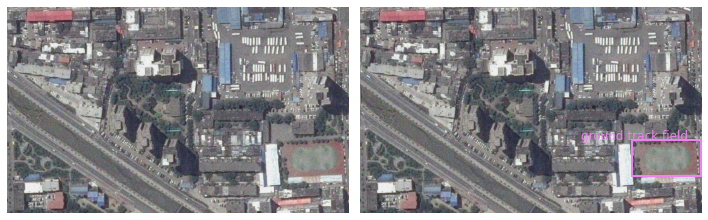

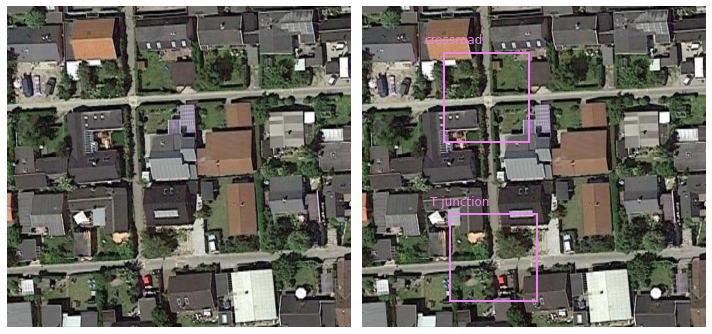

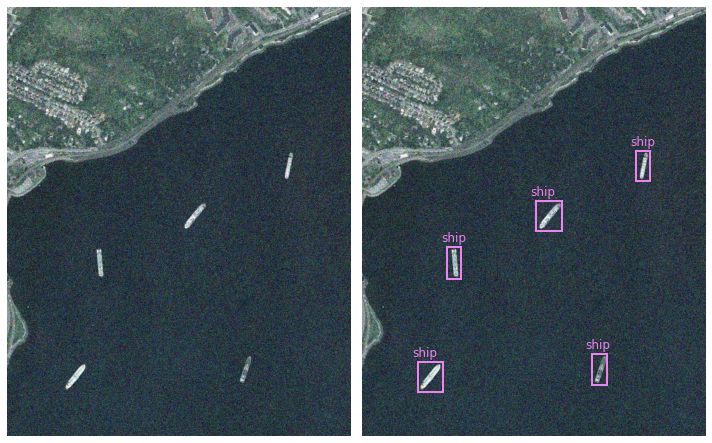

In [3]:
dataset_config = {
    "data_dir": "../data/HRRSD/JPEGImages/",
    "json_file": "../data/HRRSD/TGRS-HRRSD-Dataset/COCOFormat/Anns/hrrsd_train_m-fld_4352_3084.json"

}
dataset = ObjectDetectionCocoDataset(dataset_config)

print(f"Total number of patches: {len(dataset)}")
dataset.show_image(5);
dataset.show_image(800);
dataset.show_image(2458);

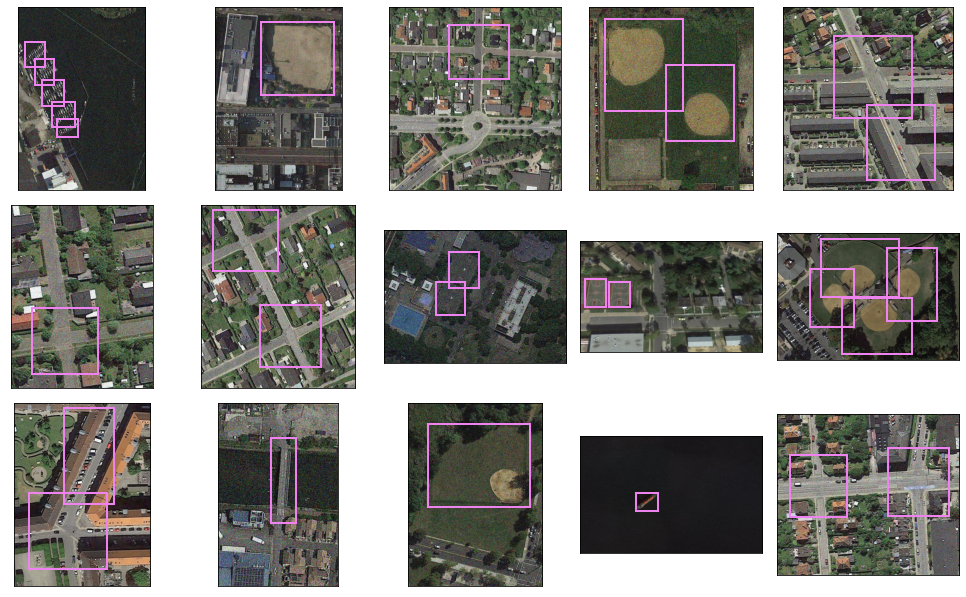

In [7]:
dataset.show_batch(15);

In [ ]:
dataset.data_distribution_table()

In [ ]:
model_config = {
            "num_classes": 4,
            "learning_rate": 0.0001,
            "pretrained": True
        }
model = FasterRCNN(model_config)
model.prepare()

model_path = "./experiments/fruits/checkpoint_1667394743.pth.tar"
labels = [None, 'apple', 'banana', 'orange']
transform = Resize()
model.load_model(model_path)

image = image_loader('../data/fruits/test/banana_89.jpg')
fig = model.detect_objects(image, labels, transform)